In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

In [2]:
# Hyperparameters
latent_dim = 100
batch_size = 128
epochs = 50
lr = 0.0002

In [3]:
# Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


### Generator above
### Discriminator below

In [5]:
# Generator Model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )
    
    def forward(self, z):
        img = self.model(z)
        return img.view(img.size(0), 1, 28, 28)

In [6]:
# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

In [9]:
# Initialize Models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

In [10]:
# Optimizers & Loss Function
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize models
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Loss function & Optimizers
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
epochs = 10
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.shape[0]

        # Generate fake images
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_imgs = generator(z)

        # Labels
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), real_labels)
        fake_loss = adversarial_loss(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        gen_loss = adversarial_loss(discriminator(fake_imgs), real_labels)
        gen_loss.backward()
        optimizer_G.step()

        # Print progress
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch {i}/{len(dataloader)}: D_loss={d_loss:.4f}, G_loss={gen_loss:.4f}")

    # Save generated images every epoch
    with torch.no_grad():
        test_z = torch.randn(16, latent_dim, device=device)
        gen_imgs = generator(test_z)
        save_image(gen_imgs, f"gan_images/epoch_{epoch}.png", normalize=True)


Epoch [0/10] Batch 0/469: D_loss=0.7010, G_loss=0.7100
Epoch [0/10] Batch 100/469: D_loss=0.9252, G_loss=0.6256
Epoch [0/10] Batch 200/469: D_loss=0.1379, G_loss=2.2733
Epoch [0/10] Batch 300/469: D_loss=0.1761, G_loss=4.8777
Epoch [0/10] Batch 400/469: D_loss=0.2381, G_loss=2.6302


NameError: name 'save_image' is not defined

Epoch [0/10] Batch 0/469: D_loss=0.6984, G_loss=0.7226
Epoch [0/10] Batch 100/469: D_loss=1.1286, G_loss=0.2220
Epoch [0/10] Batch 200/469: D_loss=0.1944, G_loss=1.9471
Epoch [0/10] Batch 300/469: D_loss=0.3130, G_loss=2.3058
Epoch [0/10] Batch 400/469: D_loss=0.9381, G_loss=1.3372


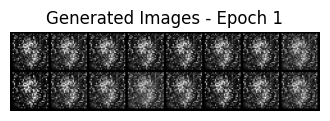

Epoch [1/10] Batch 0/469: D_loss=0.2263, G_loss=4.3223
Epoch [1/10] Batch 100/469: D_loss=0.4160, G_loss=1.9359
Epoch [1/10] Batch 200/469: D_loss=0.1284, G_loss=3.1587
Epoch [1/10] Batch 300/469: D_loss=0.2356, G_loss=5.2107
Epoch [1/10] Batch 400/469: D_loss=0.0028, G_loss=6.2748


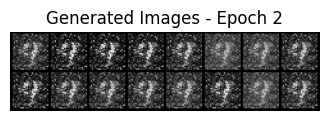

Epoch [2/10] Batch 0/469: D_loss=0.1022, G_loss=2.6303
Epoch [2/10] Batch 100/469: D_loss=0.2578, G_loss=2.1410
Epoch [2/10] Batch 200/469: D_loss=0.2489, G_loss=1.6975
Epoch [2/10] Batch 300/469: D_loss=0.1170, G_loss=2.3884
Epoch [2/10] Batch 400/469: D_loss=0.0474, G_loss=3.5537


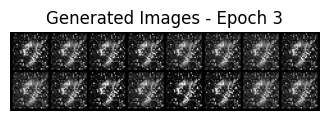

Epoch [3/10] Batch 0/469: D_loss=0.0775, G_loss=3.3430
Epoch [3/10] Batch 100/469: D_loss=0.0417, G_loss=3.4833
Epoch [3/10] Batch 200/469: D_loss=0.0351, G_loss=6.4782
Epoch [3/10] Batch 300/469: D_loss=0.0414, G_loss=4.4379
Epoch [3/10] Batch 400/469: D_loss=0.0547, G_loss=5.2163


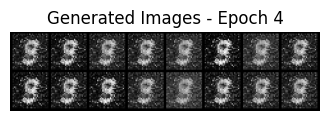

Epoch [4/10] Batch 0/469: D_loss=0.3270, G_loss=5.0091
Epoch [4/10] Batch 100/469: D_loss=0.0843, G_loss=2.3962
Epoch [4/10] Batch 200/469: D_loss=0.0956, G_loss=2.8303
Epoch [4/10] Batch 300/469: D_loss=0.1593, G_loss=2.3840
Epoch [4/10] Batch 400/469: D_loss=0.3910, G_loss=6.9942


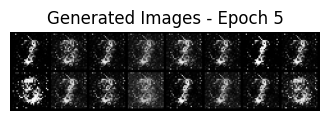

Epoch [5/10] Batch 0/469: D_loss=0.0851, G_loss=3.2336
Epoch [5/10] Batch 100/469: D_loss=0.1484, G_loss=4.2457
Epoch [5/10] Batch 200/469: D_loss=0.1679, G_loss=3.4875
Epoch [5/10] Batch 300/469: D_loss=0.6391, G_loss=3.5226
Epoch [5/10] Batch 400/469: D_loss=0.1363, G_loss=2.8038


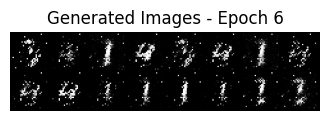

Epoch [6/10] Batch 0/469: D_loss=0.1177, G_loss=3.1144
Epoch [6/10] Batch 100/469: D_loss=0.1593, G_loss=2.8055
Epoch [6/10] Batch 200/469: D_loss=0.2898, G_loss=1.3277
Epoch [6/10] Batch 300/469: D_loss=0.1360, G_loss=4.0499
Epoch [6/10] Batch 400/469: D_loss=0.2489, G_loss=5.6723


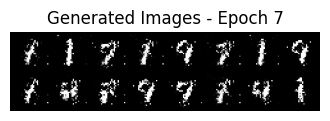

Epoch [7/10] Batch 0/469: D_loss=0.2873, G_loss=3.1782
Epoch [7/10] Batch 100/469: D_loss=0.1098, G_loss=2.5637
Epoch [7/10] Batch 200/469: D_loss=0.0817, G_loss=4.1234
Epoch [7/10] Batch 300/469: D_loss=0.1026, G_loss=3.4800
Epoch [7/10] Batch 400/469: D_loss=0.0714, G_loss=4.3416


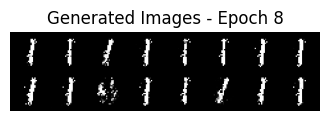

Epoch [8/10] Batch 0/469: D_loss=0.0714, G_loss=4.2861
Epoch [8/10] Batch 100/469: D_loss=0.0052, G_loss=4.0706
Epoch [8/10] Batch 200/469: D_loss=0.0049, G_loss=6.5997
Epoch [8/10] Batch 300/469: D_loss=0.0006, G_loss=7.3843
Epoch [8/10] Batch 400/469: D_loss=0.0002, G_loss=7.9612


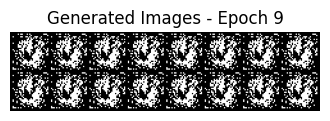

Epoch [9/10] Batch 0/469: D_loss=0.0001, G_loss=9.3396
Epoch [9/10] Batch 100/469: D_loss=0.0000, G_loss=9.5910
Epoch [9/10] Batch 200/469: D_loss=0.0000, G_loss=9.4646
Epoch [9/10] Batch 300/469: D_loss=0.0000, G_loss=9.5479
Epoch [9/10] Batch 400/469: D_loss=0.0001, G_loss=9.2566


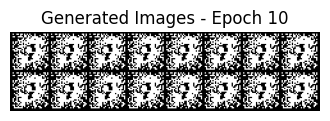

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Device configuration (Use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize models
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Loss function & Optimizers
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
epochs = 10
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.shape[0]

        # Generate fake images
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_imgs = generator(z)

        # Labels
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), real_labels)
        fake_loss = adversarial_loss(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        gen_loss = adversarial_loss(discriminator(fake_imgs), real_labels)
        gen_loss.backward()
        optimizer_G.step()

        # Print progress
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch {i}/{len(dataloader)}: D_loss={d_loss:.4f}, G_loss={gen_loss:.4f}")

    # Save & display generated images after every epoch
    with torch.no_grad():
        test_z = torch.randn(16, latent_dim, device=device)
        gen_imgs = generator(test_z).cpu()
        
        # Plot generated images
        plt.figure(figsize=(4, 4))
        plt.axis("off")
        plt.title(f"Generated Images - Epoch {epoch+1}")
        plt.imshow(vutils.make_grid(gen_imgs, normalize=True).permute(1, 2, 0))
        plt.show()
